# Apriori

## Importing the libraries

In [ ]:
!pip install apyori

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [ ]:
data=pd.read_csv("/content/Market_Basket_Optimisation.csv",header=None)
transactions=[]

for i in range(0,7501):
  transactions.append([str(data.values[i,j]) for j in range(0,20)])

## training the aprori model on the dataset

In [ ]:
from apyori import apriori
rules=apriori(transactions=transactions,min_support=0.003,min_confidence=0.2,min_lift=3,mim_length=3,max_length=3)


## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [ ]:
results=list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

### Putting the results well organised into a Pandas DataFrame

In [ ]:
def inspect(results):
  lhs=[tuple(result[2][0][0])[0] for result in results]
  rhs=[tuple(result[2][0][1])[0] for result in results]
  supports=[result[1] for result in results]
  confidences=[result[2][0][2] for result in results]
  lifts=[result[2][0][3] for result in results]
  return list(zip(lhs,rhs,supports,confidences,lifts))
resultsinDataFrame=pd.DataFrame(inspect(results),columns=['Left Hand Side','Right Hand Side','Support','Confidence','Lift'])

### Displaying the results non sorted

In [ ]:
print(resultsinDataFrame)

          Left Hand Side Right Hand Side   Support  Confidence      Lift
0            light cream         chicken  0.004533    0.290598  4.843951
1   mushroom cream sauce        escalope  0.005733    0.300699  3.790833
2                  pasta        escalope  0.005866    0.372881  4.700812
3          fromage blanc           honey  0.003333    0.245098  5.164271
4          herb & pepper     ground beef  0.015998    0.323450  3.291994
..                   ...             ...       ...         ...       ...
60     whole wheat pasta       olive oil  0.007999    0.271493  4.130772
61                 pasta          shrimp  0.005066    0.322034  4.515096
62             spaghetti       olive oil  0.005066    0.201058  3.052910
63             olive oil       spaghetti  0.004399    0.611111  3.509912
64             spaghetti        tomatoes  0.003066    0.216981  3.172662

[65 rows x 5 columns]


### Displaying the results sorted by descending lifts

In [35]:
resultsinDataFrame.nlargest(n=10,columns=["Support","Confidence","Lift"])

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
43,herb & pepper,ground beef,0.015998,0.323450,3.291994
30,spaghetti,ground beef,0.008666,0.311005,3.165328
60,whole wheat pasta,olive oil,0.007999,0.271493,4.130772
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
34,shrimp,frozen vegetables,0.007199,0.305085,3.200616
55,spaghetti,olive oil,0.007199,0.203008,3.082509
42,mineral water,ground beef,0.006666,0.390625,3.975683
38,spaghetti,tomatoes,0.006666,0.239234,3.498046
44,spaghetti,ground beef,0.006399,0.393443,4.004360


##visulation

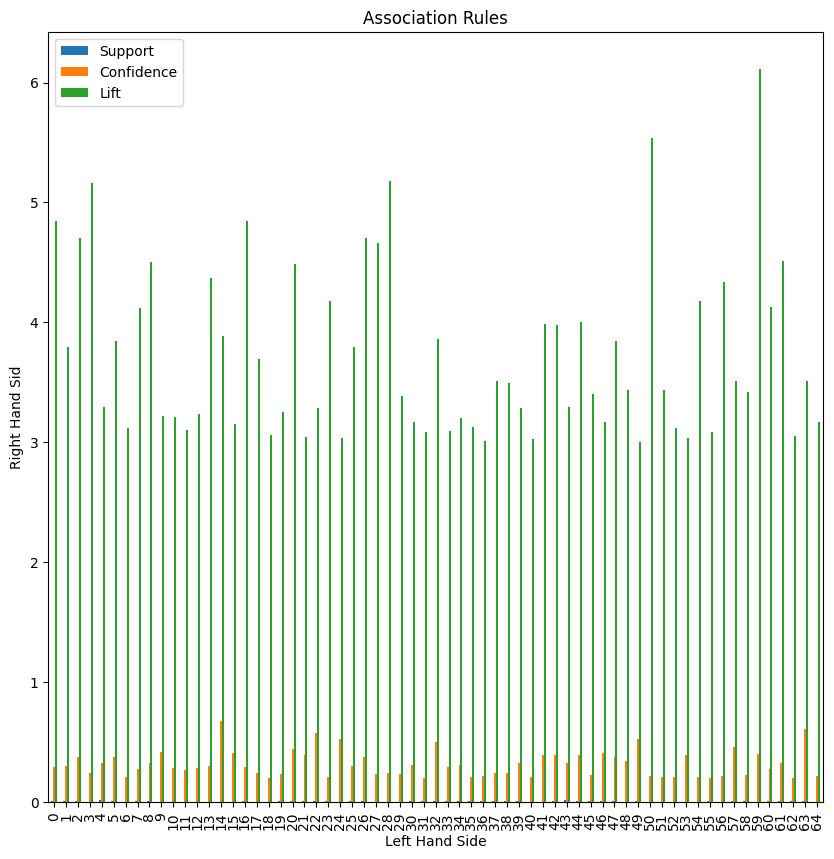

In [36]:
resultsinDataFrame.plot(kind="bar",figsize=(10,10))
plt.title("Association Rules")
plt.xlabel("Left Hand Side")
plt.ylabel("Right Hand Sid")
plt.legend()
plt.show()